# Spin-Orbit-Torque Demo


## Google Colab Link

The demo can be run on Google Colab without any local installation.
Use the following [link](https://colab.research.google.com/drive/1OWMH0_qqxM73rB5gK5pi7nFRtO4nO_N8) to try it out.

In [11]:
!pip install -q magnumnp numpy==1.22.4

## Run Demo:

In [12]:
from magnumnp import *
import torch

Timer.enable()

# initialize mesh
eps = 1e-15
#n  = (2, 2, 2)
n  = (1, 1, 1)
dx = (1.0e-9, 1.0e-9, 1e-9)

mesh = Mesh(n, dx)
state = State(mesh)

# initialize polarization, p, and charge current amplitude
# thickness of thin film on which the SOT acts
p = state.Tensor((0, -1, 0))
je = 6.9e10
d = n[2] * dx[2]
Keff = 1200e3*constants.mu_0*0.4/2./constants.mu_0

state.material = {
    "Ms": 1200e3,
    "A": 15e-12,
    "Ku": Keff,
    "Ku_axis": [0, 0, 1],
    "gamma": 2.211e5,
    "alpha": 0.048,
    "eta_damp": -0.1, # both eta with opposite sign as magnum.af, same as magnum.pi
    "eta_field": 0.3,
    "p": p,
    "d": d,
    "je": je}

# initialize field terms
exchange = ExchangeField()
aniso = UniaxialAnisotropyField()
torque = SpinOrbitTorque()

# initialize magnetization that relaxes into s-state
state.m = state.Constant([0,0,1])

# relax without external field
llg = LLGSolver([exchange, aniso])
llg.relax(state)

# perform integration with external field
state.t = 0.
llg = LLGSolver([exchange, torque, aniso])
slogger = ScalarLogger("data/log.dat", ['t', 'm', torque.h])
flogger = FieldLogger("data/fields.pvd", ['m'])

while state.t < 1e-9-eps:
    slogger << state
    flogger << state
    llg.step(state, 1e-12)

Timer.print_report()

2023-05-08 13:12:37  magnum.np:INFO [State] running on device: cpu (dtype = float64)
2023-05-08 13:12:37  magnum.np:INFO [Mesh] 1x1x1 (size= 1e-09 x 1e-09 x 1e-09)
2023-05-08 13:12:37  magnum.np:INFO [LLGSolver] using RKF45 solver (atol = 1e-05)
2023-05-08 13:12:37  magnum.np:INFO [LLG] relax: t=1e-11 dE=0 E=-2.4e-22
2023-05-08 13:12:37  magnum.np:INFO [LLGSolver] using RKF45 solver (atol = 1e-05)
2023-05-08 13:12:37  magnum.np:INFO [LLG] step: dt= 1e-12  t=1e-12
2023-05-08 13:12:37  magnum.np:INFO [LLG] step: dt= 1e-12  t=2e-12
2023-05-08 13:12:37  magnum.np:INFO [LLG] step: dt= 1e-12  t=3e-12
2023-05-08 13:12:37  magnum.np:INFO [LLG] step: dt= 1e-12  t=4e-12
2023-05-08 13:12:37  magnum.np:INFO [LLG] step: dt= 1e-12  t=5e-12
2023-05-08 13:12:37  magnum.np:INFO [LLG] step: dt= 1e-12  t=6e-12
2023-05-08 13:12:37  magnum.np:INFO [LLG] step: dt= 1e-12  t=7e-12
2023-05-08 13:12:37  magnum.np:INFO [LLG] step: dt= 1e-12  t=8e-12
2023-05-08 13:12:37  magnum.np:INFO [LLG] step: dt= 1e-12  t=9e

2023-05-08 13:12:40  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.5e-11
2023-05-08 13:12:40  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.6e-11
2023-05-08 13:12:40  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.7e-11
2023-05-08 13:12:40  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.8e-11
2023-05-08 13:12:40  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.9e-11
2023-05-08 13:12:40  magnum.np:INFO [LLG] step: dt= 1e-12  t=1e-10
2023-05-08 13:12:40  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.01e-10
2023-05-08 13:12:40  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.02e-10
2023-05-08 13:12:40  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.03e-10
2023-05-08 13:12:40  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.04e-10
2023-05-08 13:12:40  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.05e-10
2023-05-08 13:12:40  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.06e-10
2023-05-08 13:12:40  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.07e-10
2023-05-08 13:12:40  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.08e-10
2023-05-08 13:12:40  magnum.

2023-05-08 13:12:43  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.93e-10
2023-05-08 13:12:43  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.94e-10
2023-05-08 13:12:43  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.95e-10
2023-05-08 13:12:43  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.96e-10
2023-05-08 13:12:43  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.97e-10
2023-05-08 13:12:43  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.98e-10
2023-05-08 13:12:43  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.99e-10
2023-05-08 13:12:43  magnum.np:INFO [LLG] step: dt= 1e-12  t=2e-10
2023-05-08 13:12:43  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.01e-10
2023-05-08 13:12:43  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.02e-10
2023-05-08 13:12:43  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.03e-10
2023-05-08 13:12:43  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.04e-10
2023-05-08 13:12:43  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.05e-10
2023-05-08 13:12:43  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.06e-10
2023-05-08 13:12:43  ma

2023-05-08 13:12:46  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.91e-10
2023-05-08 13:12:46  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.92e-10
2023-05-08 13:12:46  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.93e-10
2023-05-08 13:12:46  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.94e-10
2023-05-08 13:12:46  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.95e-10
2023-05-08 13:12:46  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.96e-10
2023-05-08 13:12:46  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.97e-10
2023-05-08 13:12:46  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.98e-10
2023-05-08 13:12:46  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.99e-10
2023-05-08 13:12:46  magnum.np:INFO [LLG] step: dt= 1e-12  t=3e-10
2023-05-08 13:12:47  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.01e-10
2023-05-08 13:12:47  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.02e-10
2023-05-08 13:12:47  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.03e-10
2023-05-08 13:12:47  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.04e-10
2023-05-08 13:12:47  ma

2023-05-08 13:12:50  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.89e-10
2023-05-08 13:12:50  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.9e-10
2023-05-08 13:12:50  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.91e-10
2023-05-08 13:12:50  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.92e-10
2023-05-08 13:12:50  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.93e-10
2023-05-08 13:12:50  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.94e-10
2023-05-08 13:12:50  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.95e-10
2023-05-08 13:12:51  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.96e-10
2023-05-08 13:12:51  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.97e-10
2023-05-08 13:12:51  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.98e-10
2023-05-08 13:12:51  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.99e-10
2023-05-08 13:12:51  magnum.np:INFO [LLG] step: dt= 1e-12  t=4e-10
2023-05-08 13:12:51  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.01e-10
2023-05-08 13:12:51  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.02e-10
2023-05-08 13:12:51  mag

2023-05-08 13:12:55  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.87e-10
2023-05-08 13:12:55  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.88e-10
2023-05-08 13:12:55  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.89e-10
2023-05-08 13:12:55  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.9e-10
2023-05-08 13:12:55  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.91e-10
2023-05-08 13:12:55  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.92e-10
2023-05-08 13:12:55  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.93e-10
2023-05-08 13:12:55  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.94e-10
2023-05-08 13:12:55  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.95e-10
2023-05-08 13:12:55  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.96e-10
2023-05-08 13:12:55  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.97e-10
2023-05-08 13:12:55  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.98e-10
2023-05-08 13:12:55  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.99e-10
2023-05-08 13:12:55  magnum.np:INFO [LLG] step: dt= 1e-12  t=5e-10
2023-05-08 13:12:55  mag

2023-05-08 13:13:00  magnum.np:INFO [LLG] step: dt= 1e-12  t=5.85e-10
2023-05-08 13:13:00  magnum.np:INFO [LLG] step: dt= 1e-12  t=5.86e-10
2023-05-08 13:13:00  magnum.np:INFO [LLG] step: dt= 1e-12  t=5.87e-10
2023-05-08 13:13:00  magnum.np:INFO [LLG] step: dt= 1e-12  t=5.88e-10
2023-05-08 13:13:00  magnum.np:INFO [LLG] step: dt= 1e-12  t=5.89e-10
2023-05-08 13:13:00  magnum.np:INFO [LLG] step: dt= 1e-12  t=5.9e-10
2023-05-08 13:13:00  magnum.np:INFO [LLG] step: dt= 1e-12  t=5.91e-10
2023-05-08 13:13:00  magnum.np:INFO [LLG] step: dt= 1e-12  t=5.92e-10
2023-05-08 13:13:00  magnum.np:INFO [LLG] step: dt= 1e-12  t=5.93e-10
2023-05-08 13:13:00  magnum.np:INFO [LLG] step: dt= 1e-12  t=5.94e-10
2023-05-08 13:13:00  magnum.np:INFO [LLG] step: dt= 1e-12  t=5.95e-10
2023-05-08 13:13:00  magnum.np:INFO [LLG] step: dt= 1e-12  t=5.96e-10
2023-05-08 13:13:01  magnum.np:INFO [LLG] step: dt= 1e-12  t=5.97e-10
2023-05-08 13:13:01  magnum.np:INFO [LLG] step: dt= 1e-12  t=5.98e-10
2023-05-08 13:13:01  

2023-05-08 13:13:06  magnum.np:INFO [LLG] step: dt= 1e-12  t=6.83e-10
2023-05-08 13:13:06  magnum.np:INFO [LLG] step: dt= 1e-12  t=6.84e-10
2023-05-08 13:13:06  magnum.np:INFO [LLG] step: dt= 1e-12  t=6.85e-10
2023-05-08 13:13:06  magnum.np:INFO [LLG] step: dt= 1e-12  t=6.86e-10
2023-05-08 13:13:06  magnum.np:INFO [LLG] step: dt= 1e-12  t=6.87e-10
2023-05-08 13:13:06  magnum.np:INFO [LLG] step: dt= 1e-12  t=6.88e-10
2023-05-08 13:13:06  magnum.np:INFO [LLG] step: dt= 1e-12  t=6.89e-10
2023-05-08 13:13:06  magnum.np:INFO [LLG] step: dt= 1e-12  t=6.9e-10
2023-05-08 13:13:06  magnum.np:INFO [LLG] step: dt= 1e-12  t=6.91e-10
2023-05-08 13:13:06  magnum.np:INFO [LLG] step: dt= 1e-12  t=6.92e-10
2023-05-08 13:13:06  magnum.np:INFO [LLG] step: dt= 1e-12  t=6.93e-10
2023-05-08 13:13:06  magnum.np:INFO [LLG] step: dt= 1e-12  t=6.94e-10
2023-05-08 13:13:06  magnum.np:INFO [LLG] step: dt= 1e-12  t=6.95e-10
2023-05-08 13:13:06  magnum.np:INFO [LLG] step: dt= 1e-12  t=6.96e-10
2023-05-08 13:13:06  

2023-05-08 13:13:11  magnum.np:INFO [LLG] step: dt= 1e-12  t=7.81e-10
2023-05-08 13:13:12  magnum.np:INFO [LLG] step: dt= 1e-12  t=7.82e-10
2023-05-08 13:13:12  magnum.np:INFO [LLG] step: dt= 1e-12  t=7.83e-10
2023-05-08 13:13:12  magnum.np:INFO [LLG] step: dt= 1e-12  t=7.84e-10
2023-05-08 13:13:12  magnum.np:INFO [LLG] step: dt= 1e-12  t=7.85e-10
2023-05-08 13:13:12  magnum.np:INFO [LLG] step: dt= 1e-12  t=7.86e-10
2023-05-08 13:13:12  magnum.np:INFO [LLG] step: dt= 1e-12  t=7.87e-10
2023-05-08 13:13:12  magnum.np:INFO [LLG] step: dt= 1e-12  t=7.88e-10
2023-05-08 13:13:12  magnum.np:INFO [LLG] step: dt= 1e-12  t=7.89e-10
2023-05-08 13:13:12  magnum.np:INFO [LLG] step: dt= 1e-12  t=7.9e-10
2023-05-08 13:13:12  magnum.np:INFO [LLG] step: dt= 1e-12  t=7.91e-10
2023-05-08 13:13:12  magnum.np:INFO [LLG] step: dt= 1e-12  t=7.92e-10
2023-05-08 13:13:12  magnum.np:INFO [LLG] step: dt= 1e-12  t=7.93e-10
2023-05-08 13:13:12  magnum.np:INFO [LLG] step: dt= 1e-12  t=7.94e-10
2023-05-08 13:13:12  

2023-05-08 13:13:18  magnum.np:INFO [LLG] step: dt= 1e-12  t=8.79e-10
2023-05-08 13:13:18  magnum.np:INFO [LLG] step: dt= 1e-12  t=8.8e-10
2023-05-08 13:13:18  magnum.np:INFO [LLG] step: dt= 1e-12  t=8.81e-10
2023-05-08 13:13:18  magnum.np:INFO [LLG] step: dt= 1e-12  t=8.82e-10
2023-05-08 13:13:18  magnum.np:INFO [LLG] step: dt= 1e-12  t=8.83e-10
2023-05-08 13:13:18  magnum.np:INFO [LLG] step: dt= 1e-12  t=8.84e-10
2023-05-08 13:13:19  magnum.np:INFO [LLG] step: dt= 1e-12  t=8.85e-10
2023-05-08 13:13:19  magnum.np:INFO [LLG] step: dt= 1e-12  t=8.86e-10
2023-05-08 13:13:19  magnum.np:INFO [LLG] step: dt= 1e-12  t=8.87e-10
2023-05-08 13:13:19  magnum.np:INFO [LLG] step: dt= 1e-12  t=8.88e-10
2023-05-08 13:13:19  magnum.np:INFO [LLG] step: dt= 1e-12  t=8.89e-10
2023-05-08 13:13:19  magnum.np:INFO [LLG] step: dt= 1e-12  t=8.9e-10
2023-05-08 13:13:19  magnum.np:INFO [LLG] step: dt= 1e-12  t=8.91e-10
2023-05-08 13:13:19  magnum.np:INFO [LLG] step: dt= 1e-12  t=8.92e-10
2023-05-08 13:13:19  m

2023-05-08 13:13:26  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.77e-10
2023-05-08 13:13:26  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.78e-10
2023-05-08 13:13:26  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.79e-10
2023-05-08 13:13:26  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.8e-10
2023-05-08 13:13:26  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.81e-10
2023-05-08 13:13:26  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.82e-10
2023-05-08 13:13:26  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.83e-10
2023-05-08 13:13:26  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.84e-10
2023-05-08 13:13:26  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.85e-10
2023-05-08 13:13:26  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.86e-10
2023-05-08 13:13:26  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.87e-10
2023-05-08 13:13:27  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.88e-10
2023-05-08 13:13:27  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.89e-10
2023-05-08 13:13:27  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.9e-10
2023-05-08 13:13:27  m


TIMER REPORT
Operation                                No of calls    Avg time [ms]    Total time [s]
-------------------------------------  -------------  ---------------  ----------------
LLGSolver.relax                                    1     20923.3             20.9233
    ExchangeField.h                               38       548.573           20.8458
    UniaxialAnisotropyField.h                     38         0.626914         0.0238227
SpinOrbitTorque.h                                 84         0.728035         0.061155
LLGSolver.step                                    83        40.5836           3.36844
    ExchangeField.h                             1021         0.606773         0.619515
        LLGSolver.relax                            4        91.892            0.367568
            ExchangeField.h                      152         0.976127         0.148371
            UniaxialAnisotropyField.h            152         0.360722         0.0548297
        SpinOrbitTorque.h     

## Plot Results:

In [13]:
from os import path
if not path.isdir("ref"):
    !mkdir ref
    !wget -P ref https://gitlab.com/magnum.np/magnum.np/raw/main/demos/sot/ref/ref_magnumaf.dat
    !wget -P ref https://gitlab.com/nmagnum.np/magnum.np/raw/main/demos/sot/ref/ref_magnumnp.dat

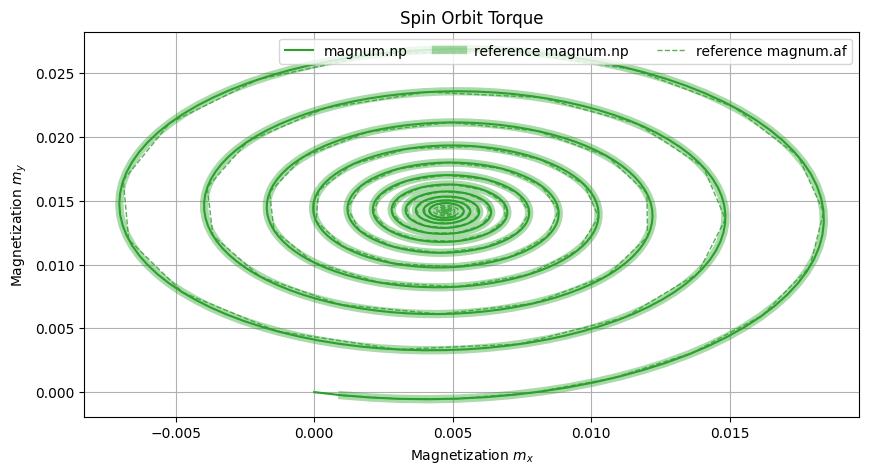

In [14]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt("data/log.dat")
ref_np = np.loadtxt("ref/ref_magnumnp.dat")
ref_af = np.loadtxt("ref/ref_magnumaf.dat")

fig, ax = plt.subplots(figsize=(10,5))
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax.plot(data[:,1], data[:,2], '-', color = cycle[2], label = "magnum.np")
ax.plot(ref_np[:,1], ref_np[:,2], '-', color = cycle[2], linewidth = 6, alpha = 0.4, label = "reference magnum.np")
ax.plot(ref_af[:,1], ref_af[:,2], '--', color = cycle[2], linewidth = 1, alpha = 0.8, label = "reference magnum.af")

#ax.set_xlim([4.82,5.0])
#ax.set_ylim([0.99994,1.0])
ax.set_title("Spin Orbit Torque")
ax.set_xlabel("Magnetization $m_x$")
ax.set_ylabel("Magnetization $m_y$")
ax.legend(ncol=3)
ax.grid()
fig.savefig("data/results.png")